# HR Analytics
# Logistic Regression To Predict Attrition in a Company. 

## 1. Data Loading

In [1]:
## importing all libraries and loading the dataset with pandas. 
from dataset import Dataset as dataset
from sklearn.linear_model import LogisticRegression
from typing import List
from skrebate import ReliefF
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef
from sklearn.model_selection import cross_val_score


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

attrition_df = pd.read_csv('turnover.csv')
col_names = attrition_df.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
attrition_df.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
attrition_df.tail()
## Visualize the last 5 elements of the dataset. 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


## 2. Data Exploration

#### 2.1 Rename column name from sales to department to make it more intuitive to work. 

In [3]:
attrition_df=attrition_df.rename(columns = {'sales':'department'})

#### 2.2 Check what are the data types present in our dataset.

In [4]:
attrition_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

#### 2.3 Description of numerical columns --> Mean, Standard Deviation, Min, Max and Quartiles

In [5]:
attrition_df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### 2.4 Checking the amount of rows and columns in our dataset. 

In [6]:
attrition_df.shape

(14999, 10)

#### 2.5 Checking the amount of unique values in our categorical variables.

##### 2.5.1 Department Column:

In [7]:
attrition_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

##### 2.5.2 Salary Column

In [8]:
attrition_df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

#### 2.6 Checking for Null values in our dataset. 

In [9]:
attrition_df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

##### There are no nulls in our dataset. 

## 3. Data Preparation

#### 3.1 Reducing the amount of departments by changing the names of similar departments. In this case we set up Support and IT departments as Technical. This reduces the amount of departments from 10 to 8. 

In [10]:
attrition_df['department']=np.where(attrition_df['department'] =='support', 'technical', attrition_df['department'])
attrition_df['department']=np.where(attrition_df['department'] =='IT', 'technical', attrition_df['department'])

attrition_df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

#### 3.2 Changing department and salary columns into characters instead of objects. 

In [11]:
attrition_df['department'] = attrition_df.department.astype('category')
attrition_df['salary'] = attrition_df.salary.astype('category')

attrition_df.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
left                        int64
promotion_last_5years       int64
department               category
salary                   category
dtype: object

#### 3.3 Outlier Analysis by Column

##### 3.3.1 Last Evaluation

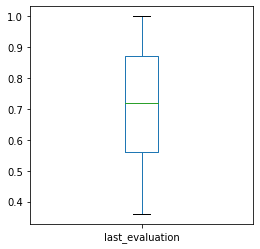

In [12]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['last_evaluation'],grid=False, fontsize=10)

##### 3.3.2 Satisfaction Level

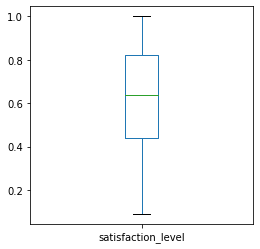

In [13]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['satisfaction_level'], grid=False, fontsize=10)

##### 3.3.3 Number of Projects

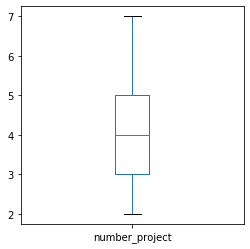

In [14]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['number_project'], grid=False, fontsize=10)

##### 3.3.4 Average Monthly Hours

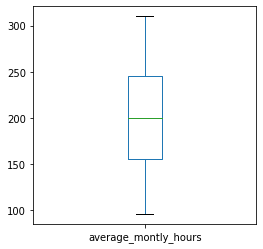

In [15]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['average_montly_hours'], grid=False, fontsize=10)

##### 3.3.5 Time Spend in Company

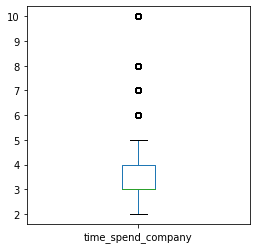

In [16]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['time_spend_company'], grid=False, fontsize=10)

##### 3.3.6 Work Accident

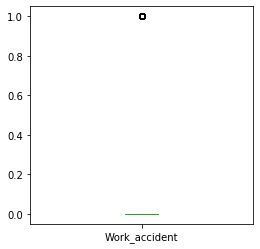

In [17]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['Work_accident'], grid=False, fontsize=10)

##### 3.3.7 Left the company

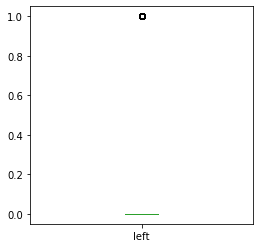

In [18]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['left'], grid=False, fontsize=10)

##### 3.3.8 Promotion Last 5 Years

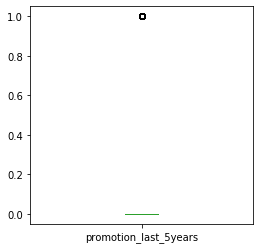

In [19]:
plt.figure(figsize=(4,4))
attrition_df.boxplot(['promotion_last_5years'], grid=False, fontsize=10)

##### There are several boolean values that contains only 0 s and 1 s. Is good to see that we dont have data points that are any other thing. 

##### After checking all the graphs we see that there is only one column presenting outliers which is the case of 'time_spend_company'. It is good to see that our boolean columns dont present  values outside of 0 s and 1 s. 

#### 3.4 Swithching from data frame running pandas to dataset to run dataset functions. 

In [20]:
attrition_ds = dataset.from_dataframe(attrition_df)
attrition_one = attrition_ds

##### Verifying that the change worked. Running a dataset command. 

In [21]:
attrition_ds.features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low


#### 3.5 Changing Data Types. Setting numerical variables as integeres in Dataset to run further functions. 

##### 3.5.1 'left' Column

In [22]:
attrition_ds.to_numerical("left")

In [23]:
attrition_ds.to_int("left")

##### 3.5.2 'Work_accident' Column

In [24]:
attrition_ds.to_int("Work_accident")

##### 3.5.3 'promotion_last_5years' Column

In [25]:
attrition_ds.to_int("promotion_last_5years")

#### 3.6 Setting Target Variable

In [26]:
attrition_ds.set_target("left")

##### To verify that it worked the dataset was split into features and target. We can check that in features we dont have the 'left' column. Afterwards verify that target contains ONLY the 'left' column.

In [27]:
attrition_ds.features.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary
0,0.38,0.53,2.0,157.0,3.0,0,0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0,0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0,0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0,0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0,0,sales,low


In [28]:
attrition_ds.target.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

#### 3.7 Plotting histograms for all numerical columns. 

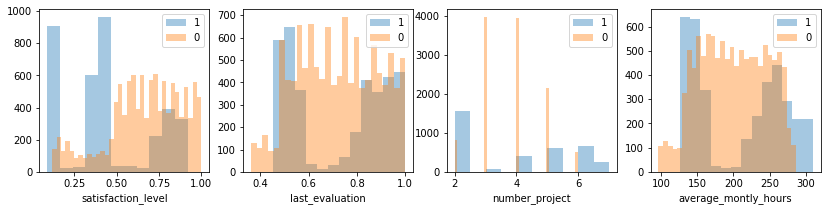

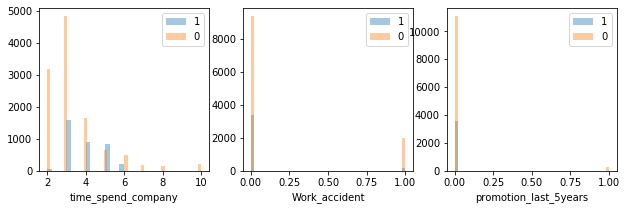

In [29]:
attrition_ds.plot_histogram()

## 4. Data Transformation

#### 4.1 One Hot Encode Categorical Variables. 

In [30]:
attrition_ds.onehot_encode("salary")

In [31]:
attrition_ds.onehot_encode("department")

##### This onehot encoding is done because in order to run Logistic Regression we cannot have any categorical values. What it does it takes all the bins from the categorical variables and changes them into Boolean features.

##### Verify that the change took place. 

In [32]:
attrition_ds.summary()

Features Summary (all):
'Work_accident'         : int64      Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1)
'average_montly_hours'  : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'last_evaluation'       : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'        : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'promotion_last_5years' : int64      Min.(0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1)
'salary_high'           : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'salary_low'            : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.48) 3rdQ(1.0) Max.(1.0)
'salary_medium'         : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.42) 3rdQ(1.0) Max.(1.0)
'satisfaction_level'    : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'time_spend_company'    : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) M

## 5. Baseline

In [33]:
attrition_fs = attrition_ds

#### Logistic Regression --> Accuracy, F1, Cross Validation.

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, matthews_corrcoef, classification_report

X,y = attrition_ds.split(test_size=0.2)

clf_baseline = LogisticRegression().fit(X.train, y.train)
pred_baseline = clf_baseline.predict(X.test)


print('F1 Score:', f1_score(y.test, pred_baseline,))
print ("")
print(classification_report(y.test,pred_baseline))

F1 Score: 0.38851674641148326

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2308
           1       0.58      0.29      0.39       692

    accuracy                           0.79      3000
   macro avg       0.70      0.61      0.63      3000
weighted avg       0.76      0.79      0.76      3000



## 6. 1st Attempt

#### 6.1 Removing Outliers.

In [35]:
attrition_ds.outliers()

array([   52,   168,   221,   226,   233,   237,   281,   355,   439,
         486,   579,   598,   674,   678,   723,   744,   897,   947,
         951,   975,   986,  1036,  1059,  1125,  1213,  1268,  1321,
        1335,  1460,  1469,  1788,  1794,  1808,  1810,  1883,  1913,
        1923,  1953,  2166,  2504,  3014,  3497,  3741,  4396,  4450,
        4633,  5019,  5151,  5229,  5314,  5413,  5490,  5586,  5662,
        5915,  6626,  6668,  7088,  7235,  7552,  7564,  7989,  8310,
        8434,  8589,  9155,  9193,  9204,  9289,  9423,  9580,  9842,
       10111, 10267, 10409, 10438, 11195, 11231, 11309, 11507, 11611,
       11725, 11745, 11754, 11760, 11764, 12052, 12168, 12221, 12226,
       12233, 12237, 12281, 12355, 12439, 12486, 12579, 12598, 12674,
       12678, 12723, 12744, 13406, 13442, 13520, 13718, 13822, 13936,
       13956, 13965, 13971, 13975, 14263, 14379, 14432, 14437, 14444,
       14448, 14492, 14566, 14650, 14697, 14790, 14809, 14919, 14949,
       14959, 14989]

In [36]:
attrition_ds.drop_samples(attrition_ds.outliers())

#### 6.2 Feature Selection
##### We run this to see which are the features that impact the regression the most. To visualize the most important variables. 

In [37]:
attrition_ds.features_importance()

{'promotion_last_5years': 0.00489543406630351,
 'department_product_mng': 0.006546298164212159,
 'department_marketing': 0.009653015937058593,
 'department_RandD': 0.011535875193329038,
 'department_management': 0.012366350615291363,
 'department_accounting': 0.013314504740770379,
 'department_hr': 0.024161118956357797,
 'Work_accident': 0.027324994956627706,
 'salary_high': 0.04256943043507485,
 'last_evaluation': 0.058570004118754716,
 'department_sales': 0.07136709030999894,
 'average_montly_hours': 0.07184793900440983,
 'satisfaction_level': 0.0789523233138328,
 'salary_medium': 0.09607625579987941,
 'department_technical': 0.10694976800484193,
 'salary_low': 0.11296483087889306,
 'number_project': 0.27777217402999166,
 'time_spend_company': 0.33987626924887615}

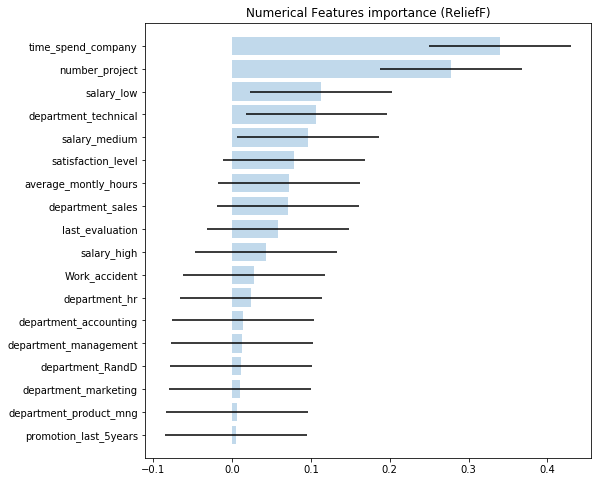

In [38]:
attrition_ds.plot_importance()

#### 6.3 Drop Columns
##### Some departments seem to be carrying no weight to the overall model so the columns will be dropped. The department that are going to be droppped are Product Management, Marketing, Management, Human Resources, Accounting and RandD. 
##### A decision was taken to keep Sales and Technical departments since they have a higher importance.

In [39]:
attrition_ds.drop_columns('department_hr')
attrition_ds.drop_columns('department_RandD')
attrition_ds.drop_columns('department_marketing')
attrition_ds.drop_columns('department_accounting')
attrition_ds.drop_columns('department_product_mng')
attrition_ds.drop_columns('department_management')
attrition_ds.drop_columns('promotion_last_5years')

#### 6.5 Checking and fixing Skewness

In [40]:
attrition_ds.skewed_features()

salary_high             3.042848
Work_accident           2.021325
time_spend_company      1.830374
department_sales        0.995212
department_technical    0.364878
number_project          0.333217
salary_medium           0.273796
salary_low              0.057451
average_montly_hours    0.041269
last_evaluation        -0.034869
satisfaction_level     -0.487070
dtype: float64

#### Fixing Skewness

In [41]:
attrition_ds.fix_skewness()

#### 6.5 Scaling

In [42]:
attrition_ds.scale(method='MinMaxScaler')

#### 6.6 2nd Run

In [43]:
attrition_ds.unset_target()

In [44]:
attrition_ds.set_target('left')

In [45]:
X, y = attrition_ds.split(test_size= 0.20)


t_base = LogisticRegression().fit(X.train, y.train)
p_base = t_base.predict(X.test)

model_chosen = LogisticRegression()

print ("**Cross Validation**")

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring = 'f1_weighted', cv=30)
print ("F1 weighted: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring="f1", cv=30)
print ("F1: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

print("")
print ("Classification Report:\n", classification_report(y.test, p_base))

**Cross Validation**
F1 weighted: 0.7812 (+/- 0.02)
F1: 0.4834 (+/- 0.04)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      2265
           1       0.58      0.40      0.47       710

    accuracy                           0.79      2975
   macro avg       0.70      0.65      0.67      2975
weighted avg       0.77      0.79      0.77      2975



## 7. 2nd Attempt

#### 7.1 Reloading the database to its original setup. 

In [77]:
attrition_df = pd.read_csv('turnover.csv')
attrition_df = attrition_df.rename(columns = {'sales':'department'})
attrition_2T = dataset.from_dataframe(attrition_df)

In [78]:
attrition_2T.summary()

Features Summary (all):
'satisfaction_level'   : float64    Min.(0.09) 1stQ(0.44) Med.(0.64) Mean(0.61) 3rdQ(0.82) Max.(1.0)
'last_evaluation'      : float64    Min.(0.36) 1stQ(0.56) Med.(0.72) Mean(0.71) 3rdQ(0.87) Max.(1.0)
'number_project'       : float64    Min.(2.0) 1stQ(3.0) Med.(4.0) Mean(3.80) 3rdQ(5.0) Max.(7.0)
'average_montly_hours' : float64    Min.(96.0) 1stQ(156.) Med.(200.) Mean(201.) 3rdQ(245.) Max.(310.)
'time_spend_company'   : float64    Min.(2.0) 1stQ(3.0) Med.(3.0) Mean(3.49) 3rdQ(4.0) Max.(10.0)
'Work_accident'        : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'left'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.23) 3rdQ(0.0) Max.(1.0)
'promotion_last_5years': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.02) 3rdQ(0.0) Max.(1.0)
'department'           : object     10 categs. 'sales'(4140, 0.2760) 'accounting'(2720, 0.1813) 'hr'(2229, 0.1486) 'technical'(1227, 0.0818) ...
'salary'               : object     3 cat

#### 7.4 Onehot Encoding categorical variables.

In [79]:
attrition_2T.onehot_encode('department')

In [80]:
attrition_2T.onehot_encode('salary')

#### 7.5 Discretize numerical variables.

In [81]:
attrition_2T.discretize("last_evaluation",[(0.36, 0.56),(0.56, 0.72),(0.72, 0.87),(0.87,1)], 
                   category_names=['low', 'medium', 'high','excelent'])

In [82]:
attrition_2T.discretize("number_project",[(2, 3),(3, 5),(5, 7),(7,10)], 
                   category_names=['low', 'medium', 'high','very_high'])

In [83]:
attrition_2T.discretize("satisfaction_level",[(0.09, 0.44),(0.44, 0.61),(0.61, 0.82),(0.82,1)], 
                   category_names=['low', 'medium', 'high','very_high'])

In [84]:
attrition_2T.discretize("time_spend_company",[(2, 3),(3, 5),(5, 10)], 
                   category_names=['low', 'medium', 'high'])

In [85]:
attrition_2T.discretize("average_montly_hours",[(96, 156),(156, 201),(201, 245),(245,310)], 
                   category_names=['low', 'medium', 'high','very_high'])

#### 7.6 Onehot Encode discretized variables

In [86]:
attrition_2T.onehot_encode('average_montly_hours')

In [87]:
attrition_2T.onehot_encode('number_project')

In [88]:
attrition_2T.onehot_encode('satisfaction_level')

In [89]:
attrition_2T.onehot_encode('time_spend_company')

In [90]:
attrition_2T.onehot_encode('last_evaluation')

#### 7.7 Check if everything worked

In [91]:
attrition_2T.summary()

Features Summary (all):
'Work_accident'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.14) 3rdQ(0.0) Max.(1.0)
'average_montly_hours_high'     : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.24) 3rdQ(0.0) Max.(1.0)
'average_montly_hours_low'      : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.25) 3rdQ(1.0) Max.(1.0)
'average_montly_hours_medium'   : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.25) 3rdQ(1.0) Max.(1.0)
'average_montly_hours_very_high': float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.24) 3rdQ(0.0) Max.(1.0)
'department_IT'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.08) 3rdQ(0.0) Max.(1.0)
'department_RandD'              : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'department_accounting'         : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.05) 3rdQ(0.0) Max.(1.0)
'department_hr'                 : float64    Min.(0.0) 1stQ(0.0) Med.(0.0) Mean(0.04) 3rdQ(0.0) Max.(1.0)
'department_management

#### 7.8 Feature Importance

In [92]:
attrition_2T.set_target('left')

In [62]:
attrition_2T.features_importance()

{'number_project_very_high': 0.0,
 'department_product_mng': 0.0003033535569038141,
 'promotion_last_5years': 0.001593439562637509,
 'department_marketing': 0.002120141342756177,
 'department_accounting': 0.0034868991266084337,
 'department_IT': 0.004423628241882826,
 'department_RandD': 0.005603706913794286,
 'department_management': 0.007197146476431757,
 'department_hr': 0.008510567371157978,
 'department_support': 0.016154410294019688,
 'department_technical': 0.018957930528702167,
 'department_sales': 0.021754783652243172,
 'salary_medium': 0.026785119007934195,
 'Work_accident': 0.02758183878925172,
 'salary_high': 0.029501966797786296,
 'salary_low': 0.041992799519967566,
 'time_spend_company_high': 0.04578305220348029,
 'number_project_high': 0.048363224214947396,
 'last_evaluation_high': 0.05933062204146994,
 'satisfaction_level_medium': 0.06725781718781297,
 'average_montly_hours_high': 0.06960130675378341,
 'average_montly_hours_medium': 0.07565171011400777,
 'average_montly

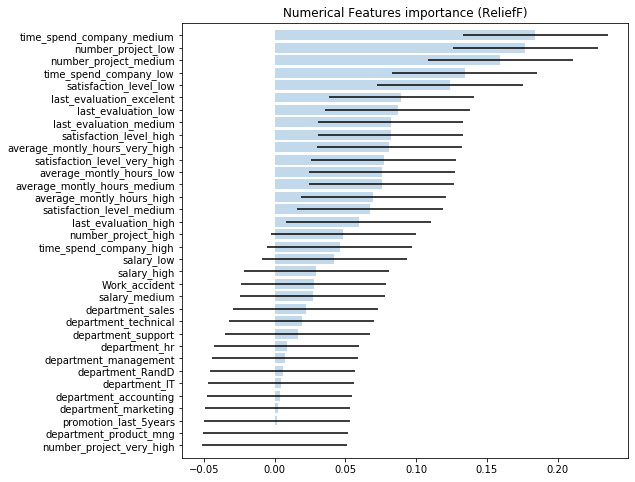

In [63]:
attrition_2T.plot_importance()

#### 7.9 Run the Model

In [93]:
X, y = attrition_2T.split(test_size= 0.20)


t_base = LogisticRegression().fit(X.train, y.train)
p_base = t_base.predict(X.test)

model_chosen = LogisticRegression()

print ("**Cross Validation**")

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring = 'f1_weighted', cv=30)
print ("F1 weighted: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring="f1", cv=30)
print ("F1: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

print("")
print ("Classification Report:\n", classification_report(y.test, p_base))

**Cross Validation**
F1 weighted: 0.8898 (+/- 0.02)
F1: 0.7673 (+/- 0.04)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2308
         1.0       0.80      0.73      0.77       692

    accuracy                           0.90      3000
   macro avg       0.86      0.84      0.85      3000
weighted avg       0.89      0.90      0.90      3000



#### 7.10 Skewness

In [94]:
attrition_2T.skewed_features()

promotion_last_5years             6.636305
department_management             4.566375
department_hr                     4.165113
department_accounting             4.075451
department_RandD                  4.014203
department_marketing              3.813401
department_product_mng            3.700350
department_IT                     3.051756
salary_high                       3.035653
time_spend_company_high           2.965324
number_project_high               2.755757
Work_accident                     2.020947
department_support                1.975747
department_technical              1.654042
satisfaction_level_medium         1.473073
last_evaluation_excelent          1.252527
satisfaction_level_very_high      1.242920
last_evaluation_medium            1.185703
satisfaction_level_low            1.179431
average_montly_hours_very_high    1.179014
average_montly_hours_high         1.176097
average_montly_hours_medium       1.143552
average_montly_hours_low          1.123303
last_evalua

In [95]:
attrition_2T.fix_skewness()

#### 7.11 Drop Column that was 0

In [96]:
attrition_2T.drop_columns("number_project_very_high")

##### The column was dropped because it presented no values within the bin. It was all zeros. 

#### 7.12 Scaling

In [97]:
attrition_2T.scale(method='MinMaxScaler')

##### The scaling is run to set up all the values on a scale from 0 to 1. This is run after fixing the skewness to make sure you dont have negative values and the distribution is normalized. 
##### Both tests Skewness and Scaling help to normalize the value in the data set

#### 7.13 Re run the Model

In [98]:
X, y = attrition_2T.split(test_size= 0.20)


t_base = LogisticRegression().fit(X.train, y.train)
p_base = t_base.predict(X.test)

model_chosen = LogisticRegression()

print ("**Cross Validation**")

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring = 'f1_weighted', cv=30)
print ("F1 weighted: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring="f1", cv=30)
print ("F1: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

print("")
print ("Classification Report:\n", classification_report(y.test, p_base))

**Cross Validation**
F1 weighted: 0.8898 (+/- 0.02)
F1: 0.7673 (+/- 0.04)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.95      0.93      2308
         1.0       0.80      0.73      0.77       692

    accuracy                           0.90      3000
   macro avg       0.86      0.84      0.85      3000
weighted avg       0.89      0.90      0.90      3000



#### 7.14 Drop Columns that have little effect on the model. 

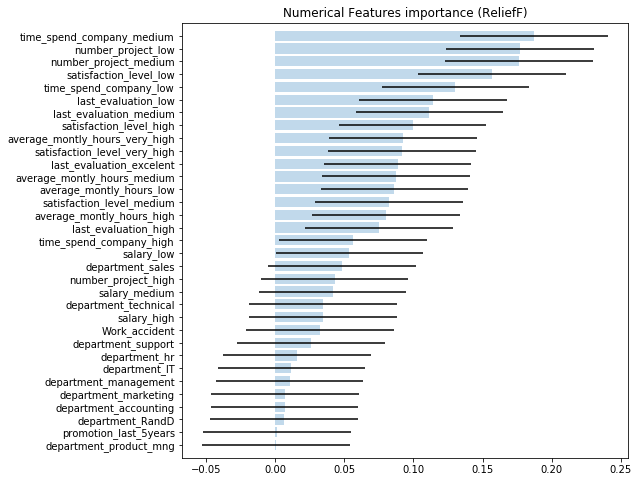

In [71]:
attrition_2T.plot_importance()

In [99]:
attrition_2T_a = attrition_2T

In [100]:
attrition_2T_a.drop_columns("department_product_mng")
attrition_2T_a.drop_columns("department_marketing")
attrition_2T_a.drop_columns("department_accounting")
attrition_2T_a.drop_columns("department_IT")
attrition_2T_a.drop_columns("department_RandD")
attrition_2T_a.drop_columns("department_management")
attrition_2T_a.drop_columns("department_hr")

##### 7.15 Re run the Model

In [101]:
X, y = attrition_2T_a.split(test_size= 0.20)


t_base = LogisticRegression().fit(X.train, y.train)
p_base = t_base.predict(X.test)

model_chosen = LogisticRegression()

print ("**Cross Validation**")

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring = 'f1_weighted', cv=30)
print ("F1 weighted: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring="f1", cv=30)
print ("F1: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

print("")
print ("Classification Report:\n", classification_report(y.test, p_base))

**Cross Validation**
F1 weighted: 0.8906 (+/- 0.02)
F1: 0.7697 (+/- 0.04)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      2308
         1.0       0.79      0.72      0.75       692

    accuracy                           0.89      3000
   macro avg       0.85      0.83      0.84      3000
weighted avg       0.89      0.89      0.89      3000



#### 7.16 Drop all the columns below the 0.05 threshold. 

In [102]:
attrition_2T_a.drop_columns("department_support")
attrition_2T_a.drop_columns("department_technical")
attrition_2T_a.drop_columns("department_sales")
attrition_2T_a.drop_columns("salary_low")
attrition_2T_a.drop_columns("salary_high")
attrition_2T_a.drop_columns("salary_medium")
attrition_2T_a.drop_columns("Work_accident")
attrition_2T_a.drop_columns("time_spend_company_high")
attrition_2T_a.drop_columns("number_project_high")

#### 7.17 Remove outliers

In [103]:
attrition_2T.drop_samples(attrition_2T.outliers())

#### 7.18 Re run the Model

In [104]:
X, y = attrition_2T_a.split(test_size= 0.20)


t_base = LogisticRegression().fit(X.train, y.train)
p_base = t_base.predict(X.test)

model_chosen = LogisticRegression()

print ("**Cross Validation**")

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring = 'f1_weighted', cv=30)
print ("F1 weighted: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

crossval_score = cross_val_score(model_chosen, X.train, y.train, scoring="f1", cv=30)
print ("F1: %0.4f (+/- %0.2f)" % (np.median(crossval_score),np.std(crossval_score)))

print("")
print ("Classification Report:\n", classification_report(y.test, p_base))

**Cross Validation**
F1 weighted: 0.8888 (+/- 0.02)
F1: 0.7842 (+/- 0.03)

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      1840
         1.0       0.85      0.78      0.81       734

    accuracy                           0.90      2574
   macro avg       0.88      0.86      0.87      2574
weighted avg       0.90      0.90      0.90      2574



## 8. Final Score

#### F1 --> 0.89
#### F1 weighted --> 0.78
#### Accuracy --> 0.90
#### Predicting "0" , people staying --> Precision = 0.92 , Recall = 0.94 , F1 Score = 0.93
#### Predicting "1" , people leaving --> Precision = 0.85 , Recall = 0.78 , F1 Score = 0.81

## 9. Interpretation

#### During the EDA observations could be made about our dataset. This dataset presented a great skewness toward zeros, this meaning people staying within the company. The people that left the company represented a very small sample of the people, this makes the analysis complicated because you have to normalize the approach as much as possible in order to run the Logistic Regression. 
#### The Boxplot section is designed to search for outliers within each of the numerical variables that are present in the dataset. The only feature that presented outliers was Time Spend in Company. This is due to the very few people that have worked within the company for a long time. 
#### After the boxplots the process continues with the assignation of the target, in this case is the "left" feature. This is regarding the people that leave the company. Once this is set the next step is to plot the histograms to see the distributions. Looking at the distributions a inference can me made that most of them dont have a normal behaviour and further analysis should be done on them. 
#### Before making any modifications a reference score is needed with the data untreated. That score is the baseline. That presents an F1 score of 0.39. 
#### Now that the baseline was obtained further data preparation is needed to improve that baseline. Some steps were followed to get a 2nd score. First performance of a removal of outliers after this step feature importance was performed in order to remove the features that carried no wieght towards a person leaving the company. The next steps are about fixing the noramlization problem that was identified in the Data Transformation. Skewness correction was called to normalize the data after this step the variables were scaled so the result of this would be variables with data points between zeros and ones. The second test was run obtaining an F1 score of 0.48. This was a 10% improvement, this is due because the data was normalized before the re run. This shows the importance of having a normal distribution while running a Logistic Regression. 
#### Another attempt was made trying to get a better prediction of the people leaving the company. During this second try several actions were performed. The first action was to discretize the numerical variables and bin them to a set of key words based on their value. After onehot encoding was performed making all the variables previously binned now features based on their keywords and initial feature name. This provided an extenden layout of features moving from 10 features to above 30 features. This could be adjusted based on the binned values to make more or less features. the desicion was made to bin them in 4 categories ranging from low to very high. 
#### With the 30+ features now created and previously learnt the value of having a normalized dataset skewness and scaling tasks were performed. Following this tests Feature selection was realized carrying out feature importance. Based on a feature importance threshold of 0.05 all features that didnt comply with this were eliminated. In the end 14 features represented the variables that had the most importane towards a person making the decions to leave or to stay. The final step before running the model was getting rid of outliers that would skew the results. 
#### The 2nd attempt was concluded getting the final score previously stated in this document. The interpretation for the final score can be made as follows. The F1 metric of the model shows that there is a 93% chance of correctly predicting a person staying in the company and there is a 81% chance of predicting a person leaving the company. This discrepancy between data is due towards the biased of the dataset. Further metrics can be interpreted which are the precision and the recall values. The precision is a metric that is the ratio of correctly predicted positive observations to the total predicted positive observations. This states that of all the people leaving or staying in a company we can predict 85% and 92% respectively. The recall is the ratio of correctly predicted positive observations to the all observations in actual class. This states that out of all the people we predicted were going to leave how many people actually left or stayed depending on the case. The results for the recall matrix are 94% and 78% for people staying and leaving respectively. 
